We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np
import pandas as pd

In [2]:
# !pip install dill, this is a tool that allows me to save the state of my notebook so that I don't lose my progress
# when I need to restart the kernal.
# import dill

In [3]:
# # I scroll up and execute this cell whenever I want to save the state of the notebook. 
# dill.dump_session('mushroom-classification-research-notebook_env.db')

In [4]:
# # I scroll up and execute this cell whenever I want to load the previous state of my notebook.
# # Each time I create a new learner, I copy it here because it is nessesary to recreate the learner
# # before I can load the wieghts and biases etc... that i have saved in the dill notebook_env.db file.
# # The learners will contain frozen models when they are re-initiated. I need to remember to unfreeze them
# # if that is what I am looking for.
# dill.load_session('mushroom-classification-research-notebook_env.db')
# learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# # learn50 = cnn_learner(data, models.resnet50, metrics=error_rate)
# # The procedure outlined in the last few cells didn't end up working for me
# # I moved over to using the learner.export method to save progress. Where I have to remember to save and load
# # each model individually. 

In [5]:
# # load in all the models in the notebook so I can start from where I left off
# path = Path('mushroom_classification_data_cleaned/')
# learn = load_learner(path, 'res34.pkl')
# It turns out that the load_learner method is for creating a copy of your model for prediction purposes. 

**purpose:**<br>
To learn about: Neural nets, transfer learning, .

limitations: the image should be a close up image

**Here I build a classifier that will:**
Input: an image of a mushroom.
Output: mushroom species.
Training data obtained by scrapping bing image search for the top 300 images using: https://github.com/ultralytics/google-images-download



**data info: 17,593 images in 73 classes**.  


In [3]:
bs = 64

In [3]:
# from zipfile import ZipFile

In [4]:
# # unzip the zip file that contains our data
# with ZipFile('mushroom_classification_data_cleaned.zip', 'r') as archive:
#      archive.extractall()

In [4]:
path = Path('mushroom_classification_data_cleaned/')

In [10]:
# Take a look at what images are under the path
ImageList.from_folder(path)

ImageList (17593 items)
Image (3, 1122, 1496),Image (3, 576, 1024),Image (3, 414, 620),Image (3, 1122, 1496),Image (3, 1370, 1024)
Path: mushroom_classification_data_cleaned

In [11]:
# talk about data augmentation here
tfms = get_transforms()
np.random.seed(33)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

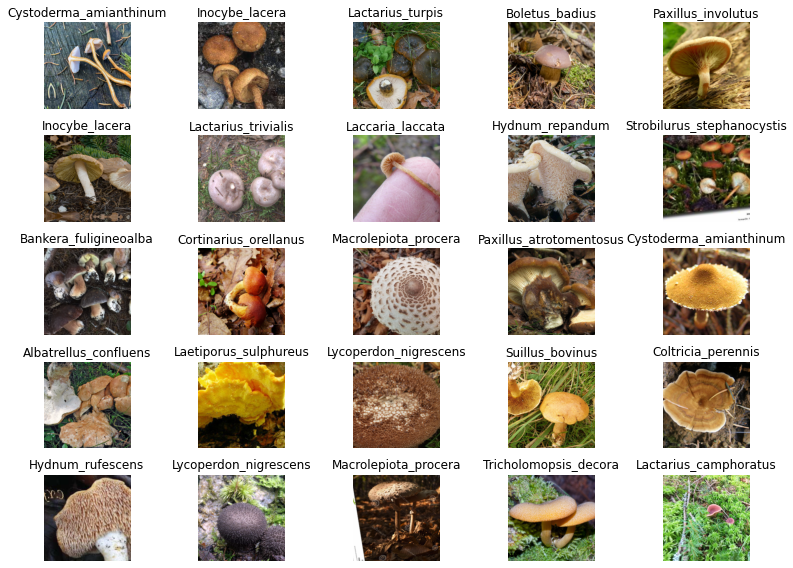

In [12]:
# doing this to see that data is not cropped or transformed poorly.
data.show_batch(rows=5, figsize=(11,8))

In [13]:
print(data.classes)
print(len(data.classes))
print(len(data.train_ds))
print(len(data.valid_ds))
print(len(data.train_ds)+len(data.valid_ds))

['Agaricus_augustus', 'Albatrellus_confluens', 'Albatrellus_ovinus', 'Amanita_ceciliae', 'Amanita_fulva', 'Amanita_muscaria', 'Amanita_virosa', 'Armillaria_mellea', 'Auriscalpium_vulgare', 'Bankera_fuligineoalba', 'Boletus_badius', 'Boletus_edulis', 'Calocera_viscosa', 'Calocybe_gambosa', 'Cantharellula_umbonata', 'Cantharellus_cibarius', 'Chalciporus_piperatus', 'Coltricia_perennis', 'Coprinopsis_atramentaria', 'Coprinus_comatus', 'Coprinus_plicatilis', 'Cortinarius_alboviolaceus', 'Cortinarius_armillatus', 'Cortinarius_croceus', 'Cortinarius_orellanus', 'Cortinarius_rubellus', 'Cortinarius_semisanguineus', 'Cortinarius_traganus', 'Cystoderma_amianthinum', 'Entoloma_sericeum', 'Hebeloma_crustuliniforme', 'Hericium_erinaceus', 'Hortiboletus_rubellus', 'Hydnum_repandum', 'Hydnum_rufescens', 'Hypholoma_marginatum', 'Inocybe_lacera', 'Kuehneromyces_mutabilis', 'Laccaria_laccata', 'Lactarius_camphoratus', 'Lactarius_deliciosus', 'Lactarius_tabidus', 'Lactarius_trivialis', 'Lactarius_turpis

In [14]:
# explain here what resnet34 is, and the idea of transfer learning.
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [15]:
# explain here one cycle learning
help(learn.fit_one_cycle)

Help on method fit_one_cycle in module fastai.train:

fit_one_cycle(cyc_len: int, max_lr: Union[float, Collection[float], slice] = slice(None, 0.003, None), moms: Tuple[float, float] = (0.95, 0.85), div_factor: float = 25.0, pct_start: float = 0.3, final_div: float = None, wd: float = None, callbacks: Union[Collection[fastai.callback.Callback], NoneType] = None, tot_epochs: int = None, start_epoch: int = None) -> None method of fastai.basic_train.Learner instance
    Fit a model following the 1cycle policy.



In [16]:
learn.fit_one_cycle(4) # uses default learning rate of 0.003

epoch,train_loss,valid_loss,error_rate,time
0,3.043680,1.956377,0.504264,03:04
1,2.112349,1.597232,0.414440,02:09
2,1.725724,1.415526,0.365264,02:08
3,1.434878,1.382792,0.355031,02:10


In [17]:
learn.save('resnet34-stage-1')

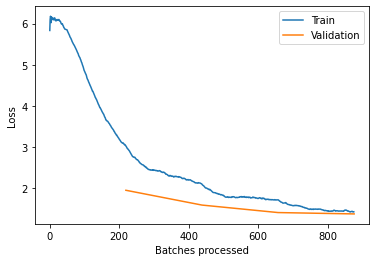

In [18]:
learn.recorder.plot_losses()

In [19]:
# The classificationInterpretation object contains all the information needed to interperate the model.
# Basically exactly the things that I will looking at in the next few cells
interp = ClassificationInterpretation.from_learner(learn)

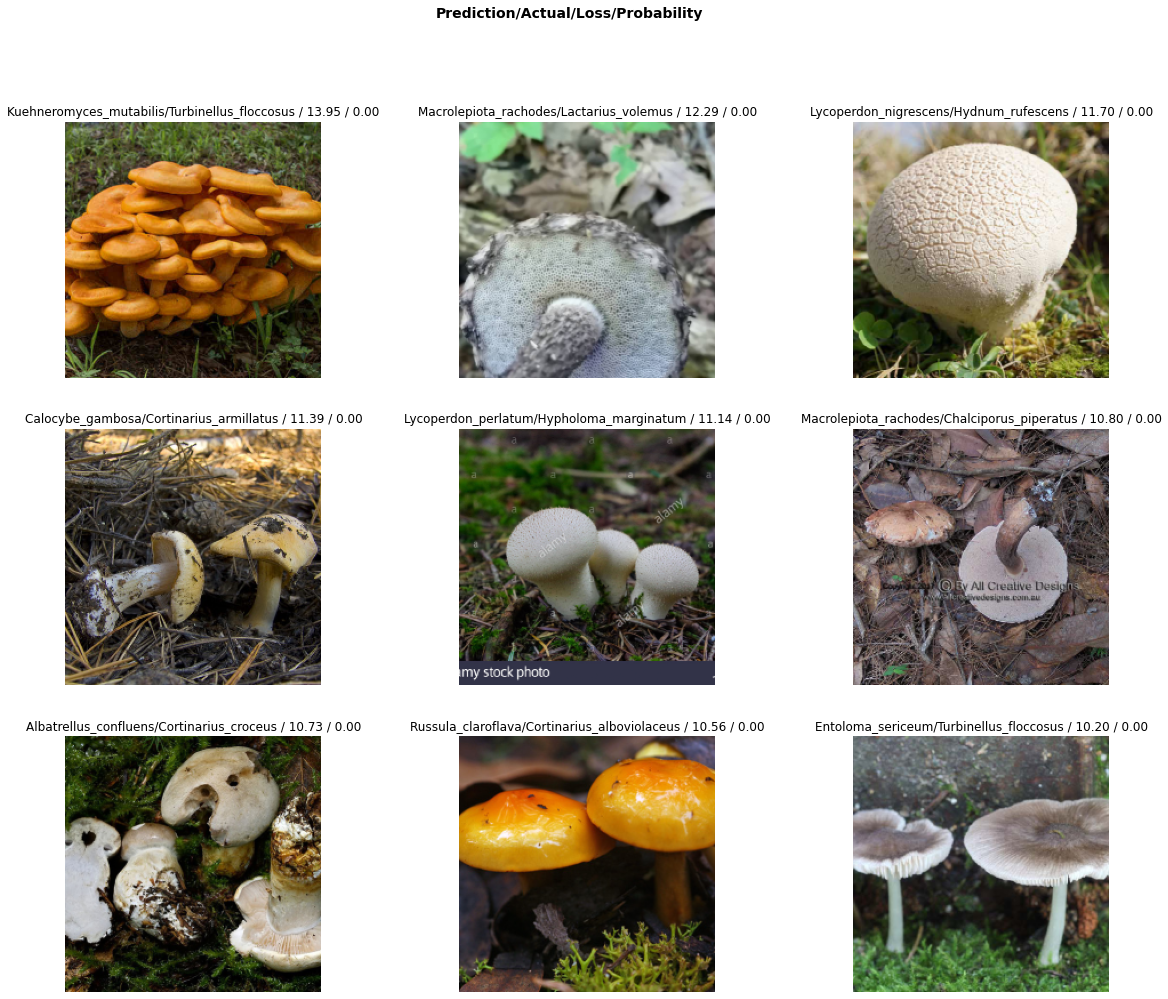

In [20]:
interp.plot_top_losses(9, figsize=(20,16))

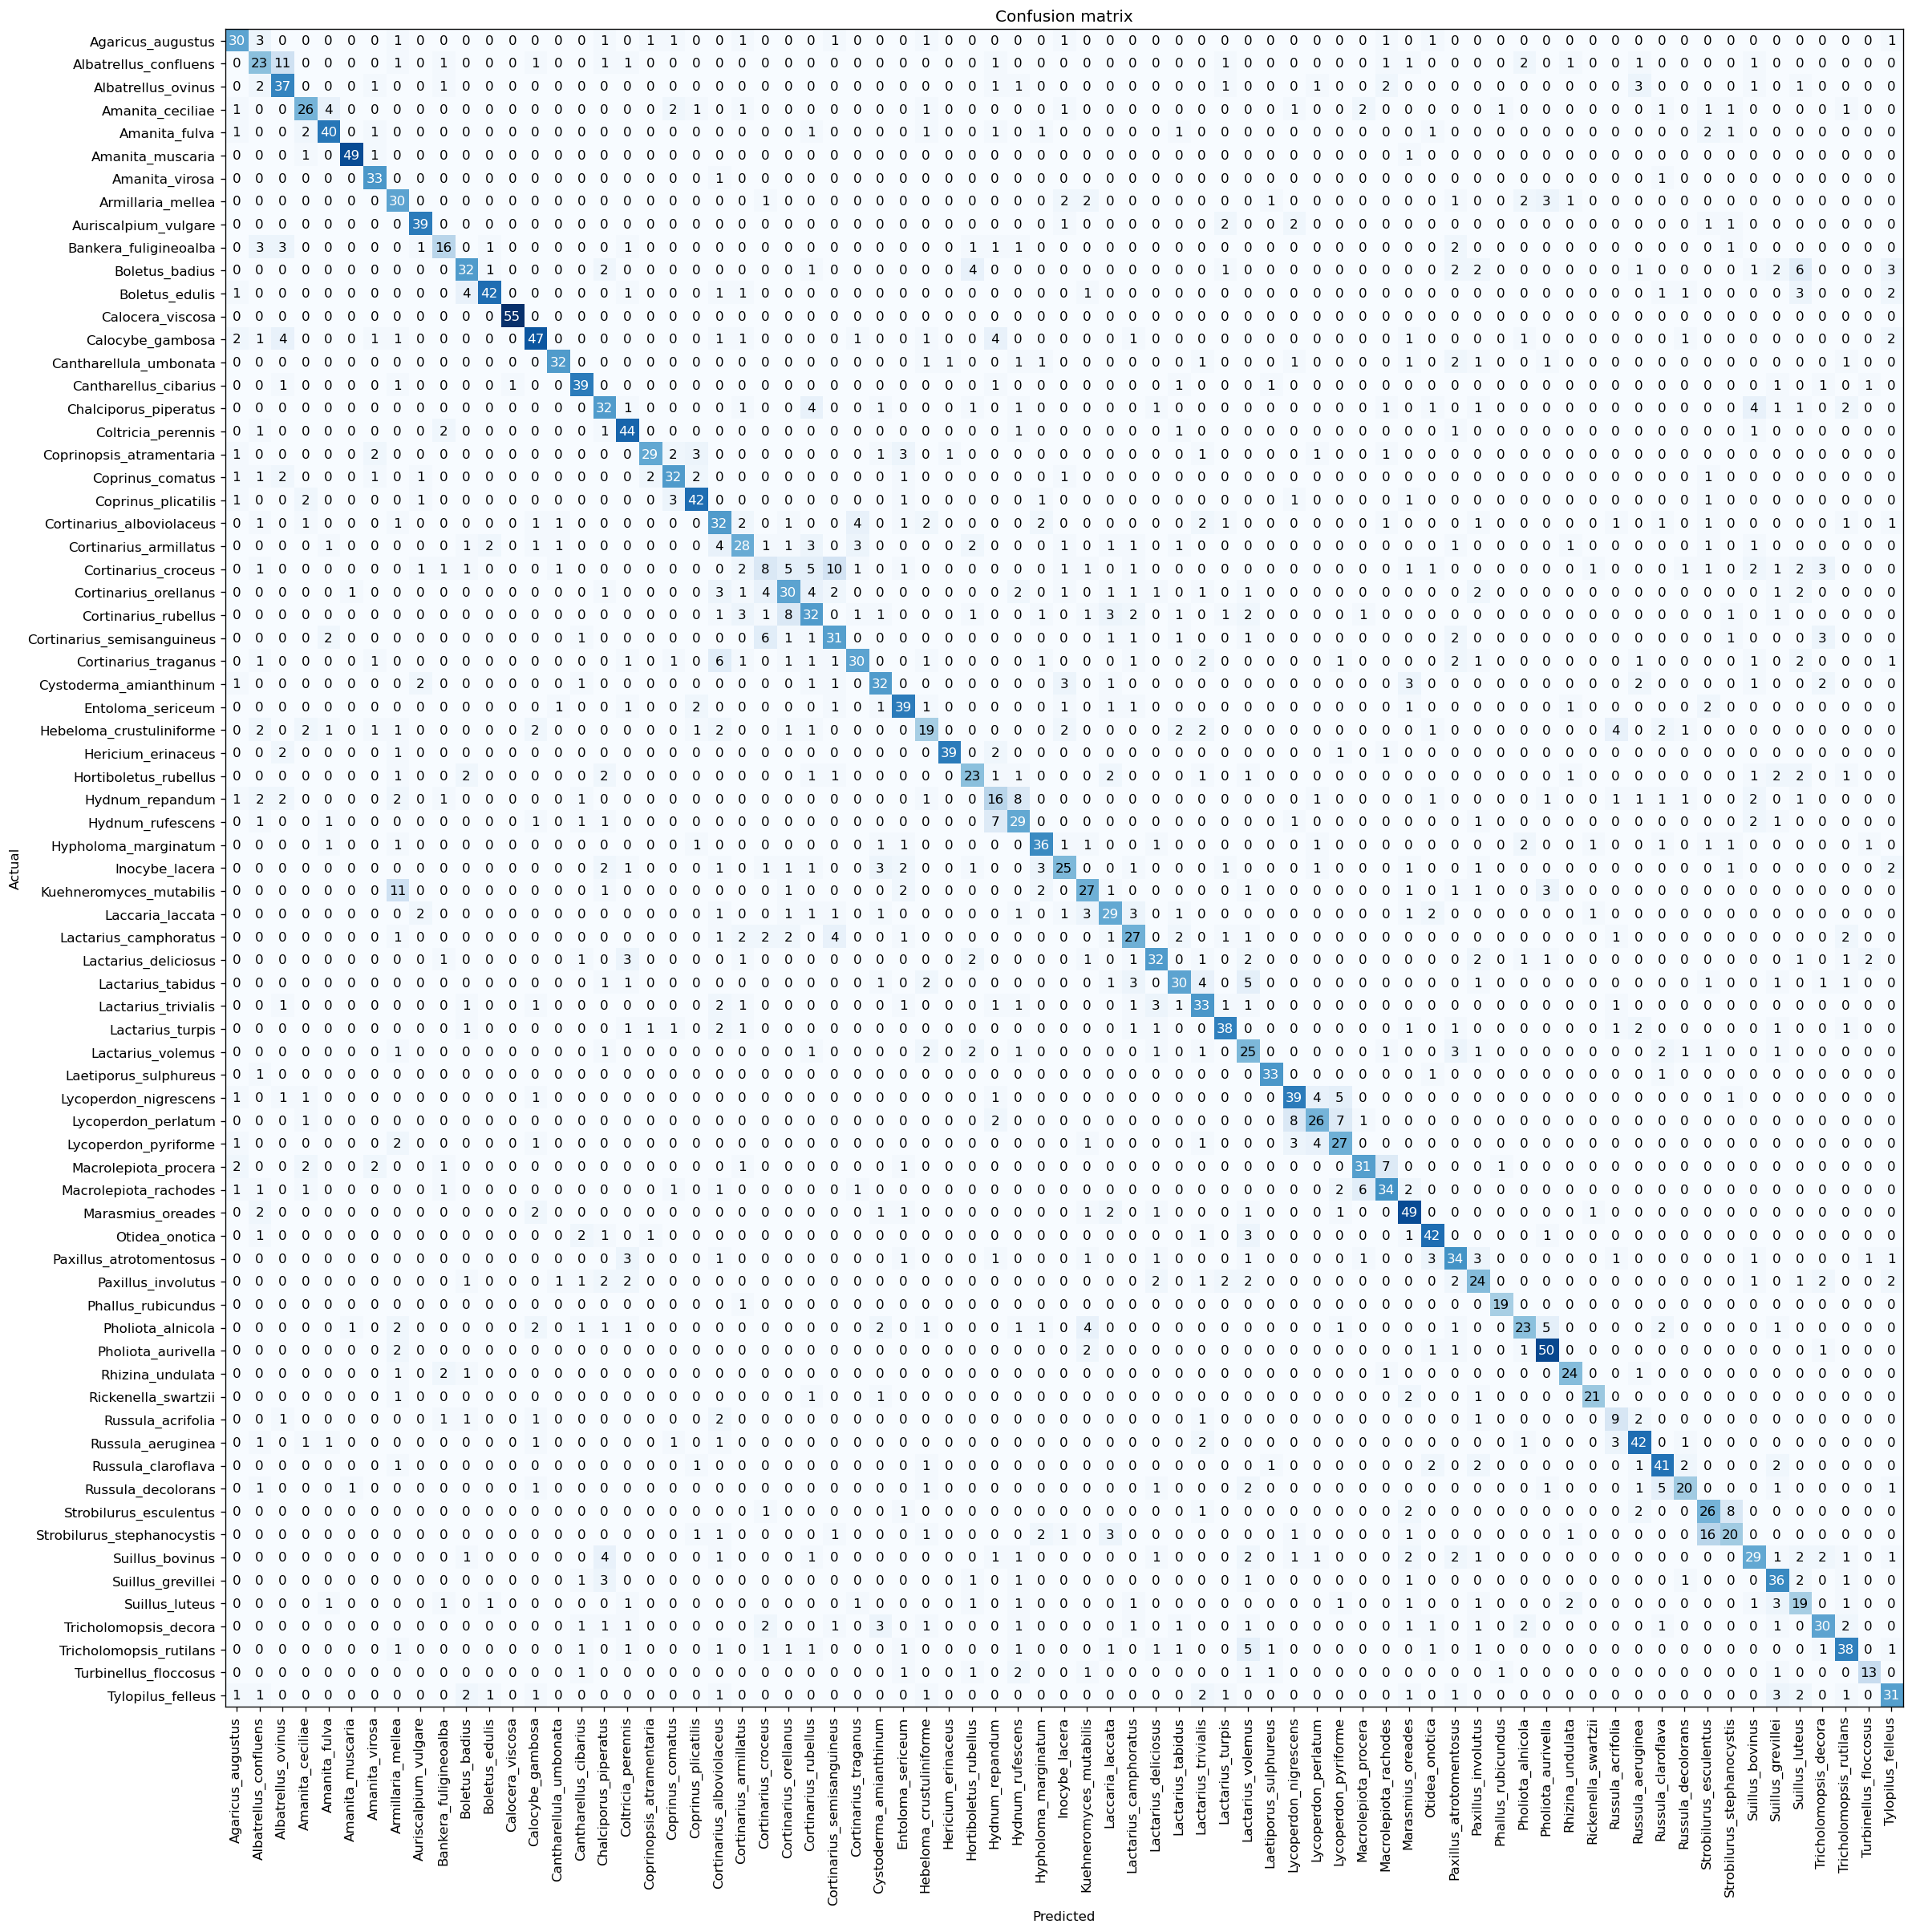

In [25]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=120)

In [26]:
interp.most_confused(min_val=2)

[('Strobilurus_stephanocystis', 'Strobilurus_esculentus', 16),
 ('Albatrellus_confluens', 'Albatrellus_ovinus', 11),
 ('Kuehneromyces_mutabilis', 'Armillaria_mellea', 11),
 ('Cortinarius_croceus', 'Cortinarius_semisanguineus', 10),
 ('Cortinarius_rubellus', 'Cortinarius_orellanus', 8),
 ('Hydnum_repandum', 'Hydnum_rufescens', 8),
 ('Lycoperdon_perlatum', 'Lycoperdon_nigrescens', 8),
 ('Strobilurus_esculentus', 'Strobilurus_stephanocystis', 8),
 ('Hydnum_rufescens', 'Hydnum_repandum', 7),
 ('Lycoperdon_perlatum', 'Lycoperdon_pyriforme', 7),
 ('Macrolepiota_procera', 'Macrolepiota_rachodes', 7),
 ('Boletus_badius', 'Suillus_luteus', 6),
 ('Cortinarius_semisanguineus', 'Cortinarius_croceus', 6),
 ('Cortinarius_traganus', 'Cortinarius_alboviolaceus', 6),
 ('Macrolepiota_rachodes', 'Macrolepiota_procera', 6),
 ('Cortinarius_croceus', 'Cortinarius_orellanus', 5),
 ('Cortinarius_croceus', 'Cortinarius_rubellus', 5),
 ('Lactarius_tabidus', 'Lactarius_volemus', 5),
 ('Lycoperdon_nigrescens', 'L

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


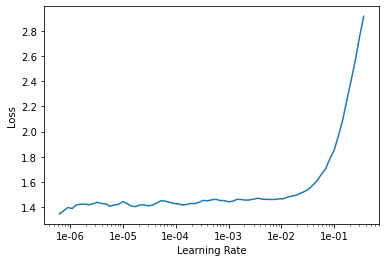

In [28]:
learn.recorder.plot()

In [51]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.410609,1.368828,0.348493,02:08
1,1.369111,1.363491,0.350199,02:08


In [30]:
learn.save('resnet34-stage-2')

Ok, now lets try the same steps, but with resnet50.

In [31]:
learn50 = cnn_learner(data, models.resnet50, metrics=error_rate)

In [32]:
learn50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.628123,1.796513,0.471290,02:11
1,1.933633,1.488750,0.389426,02:10
2,1.477178,1.295957,0.349346,02:09
3,1.202978,1.238347,0.332860,02:10


In [34]:
learn50.save('resnet50-stage-1')

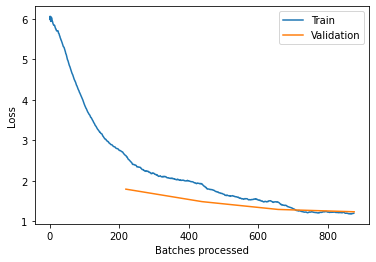

In [36]:
learn50.recorder.plot_losses()

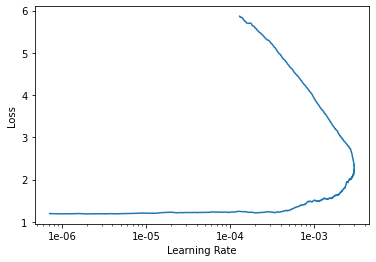

In [37]:
learn50.recorder.plot()

In [38]:
learn50.unfreeze()

In [40]:
learn50.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.102308,1.146434,0.305003,02:12
1,0.919248,1.093050,0.289937,02:12


In [41]:
learn50.save('resnet50-stage-2')

Ok, resnet50 yielded the stronger model. So lets use that one to create a learner that I will use with the fastai datasSetFormatter to clean up the data a bit more.

In [42]:
# I want the entire dataset to be...
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [45]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)
learn_cln.load('resnet50-stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (17593 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus
Path: mushroom_classification_data_cleaned;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: mushroom_classification_data_cleaned;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [8]:
from fastai.widgets import *

In [49]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [50]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

'No images to show :)'

Now that we have cleaned the data further using our early version of the model ('resnet50-stage-3'), let's train the model over again using this cleaner data set. We will use resnet50 again. The information about which of the images from the original data set are to be included in the cleaned data set is held in a csv file, so I will create my data bunch from that. 

In [22]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

In [8]:
df.head(5)

,name,label
0,Hortiboletus_rubellus/71.Rubellus-2.jpg,Hortiboletus_rubellus
1,Hortiboletus_rubellus/230.20190928_171345-1024...,Hortiboletus_rubellus
2,Hortiboletus_rubellus/174.jan_hrasko_531001.jpg,Hortiboletus_rubellus
3,Hortiboletus_rubellus/85.Ruby-12.jpg,Hortiboletus_rubellus
4,Hortiboletus_rubellus/76.c8003dc2020c9a89ce9eb...,Hortiboletus_rubellus


In [9]:
doc(ImageDataBunch.from_df)

In [23]:
tfms = get_transforms()
np.random.seed(33)
data = ImageDataBunch.from_df(path, df, valid_pct=0.2, ds_tfms=tfms, size=112).normalize(imagenet_stats)

In [11]:
data

ImageDataBunch;

Train: LabelList (13384 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus
Path: mushroom_classification_data_cleaned;

Valid: LabelList (3345 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Calocybe_gambosa,Kuehneromyces_mutabilis,Cortinarius_rubellus,Paxillus_atrotomentosus,Cantharellus_cibarius
Path: mushroom_classification_data_cleaned;

Test: None

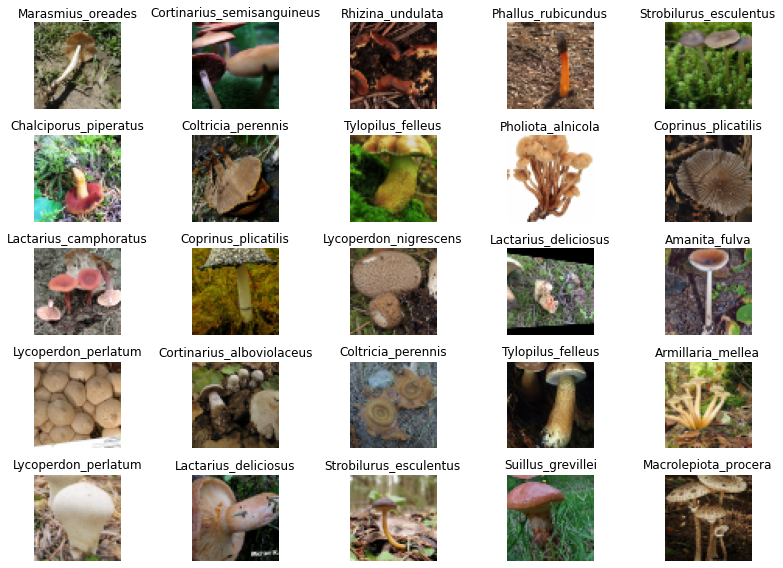

In [6]:
data.show_batch(rows=5, figsize=(11,8))

In [12]:
learn50 = cnn_learner(data, models.resnet50, metrics=error_rate)

In [21]:
learn50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.678281,1.736085,0.442750,02:39
1,1.879477,1.399873,0.380568,01:48
2,1.464225,1.216722,0.324066,01:47
3,1.176869,1.178988,0.312108,01:48


In [22]:
learn50.save('res50-TLcleaned-stage-1')

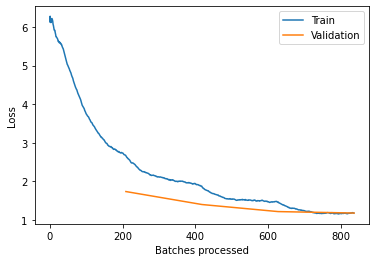

In [23]:
learn50.recorder.plot_losses()

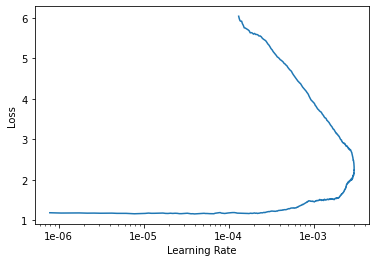

In [24]:
learn50.recorder.plot()

In [26]:
learn50.unfreeze()
learn50.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.074112,1.093802,0.293871,01:51
1,0.895195,1.053917,0.283707,01:49


In [27]:
learn50.save('res50-TLcleaned-stage-2')

In [28]:
learn50.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.845342,1.031321,0.276532,01:50
1,0.738512,0.999512,0.263677,01:49


The model still seems to be learning, so lets train it for 4 more epochs. Later I will go back a try a different learning rate to see if I can get it to learn faster. 

In [29]:
learn50.save('res50-TLcleaned-stage-3')

In [30]:
learn50.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.693006,0.993577,0.263976,01:50
1,0.673909,0.975672,0.251719,01:50
2,0.559191,0.964800,0.251121,01:50
3,0.449586,0.960926,0.252317,01:49


It looks liek 75% accuracy is the best this is going to get with the settings used so far.
It also looks like the model is starting to overfit. Let's run 4 more epochs to see if the error_rate continues to get worse (keeping in that we are using the fit_one_cycle policy). 

In [31]:
learn50.save('res50-TLcleaned-stage-4')

In [32]:
learn50.fit_one_cycle(8, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.459751,0.981083,0.255306,01:50
1,0.478010,0.970113,0.242152,01:50
2,0.389037,0.958018,0.246039,01:50
3,0.313325,0.953507,0.240060,01:50


In [33]:
learn50.save('res50-TLcleaned-stage-5')

Hmmm, the model is still improving slowly. Validation loss ~ 3x training loss, there may be a bit of overfitting, but I think thats OK. 

In [34]:
learn50.fit_one_cycle(6, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.318824,0.951200,0.239761,01:50
1,0.355939,0.991099,0.247833,01:49
2,0.331649,0.986037,0.243348,01:51
3,0.258479,0.975986,0.245740,01:51
4,0.220938,0.976072,0.241555,01:51
5,0.189694,0.975202,0.238266,01:50


Lets try 8 more epochs.

In [35]:
learn50.fit_one_cycle(8, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.196223,0.978540,0.235575,01:50
1,0.212488,1.012161,0.245740,01:49
2,0.237634,1.032232,0.249327,01:49
3,0.219304,1.041428,0.243946,01:49
4,0.175617,1.036215,0.238565,01:49
5,0.152865,1.036088,0.241256,01:50
6,0.133678,1.033621,0.237070,01:49
7,0.115479,1.035727,0.237967,01:49


This looks like as good as it will get by this method. 
Let's go back and see how good I can get a resnet50 model using the previous version of the data set.

In [36]:
tfms = get_transforms()
np.random.seed(33)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

In [37]:
learn50 = cnn_learner(data, models.resnet50 ,metrics=error_rate)

In [38]:
learn50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.635216,1.887578,0.474702,01:53
1,1.921093,1.488728,0.396532,01:51
2,1.511500,1.305397,0.343093,01:51
3,1.215229,1.245625,0.324616,01:50


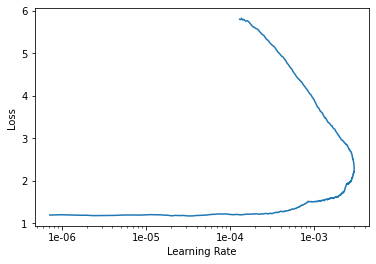

In [39]:
learn50.recorder.plot()

In [40]:
learn50.unfreeze()

In [41]:
learn50.fit_one_cycle(8, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.104899,1.207628,0.317226,01:54
1,1.037205,1.127110,0.302445,01:54
2,0.917657,1.054744,0.278852,01:54
3,0.794254,1.017243,0.270608,01:53
4,0.631840,0.992483,0.263786,01:53
5,0.558650,0.989420,0.256680,01:53
6,0.501249,0.981133,0.255543,01:53
7,0.463525,0.976633,0.258101,01:52


In [42]:
learn50.fit_one_cycle(8, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.479317,0.981518,0.254974,01:53
1,0.488641,0.996420,0.260659,01:52
2,0.486246,1.010916,0.261796,01:53
3,0.422395,1.004679,0.260375,01:52
4,0.334247,0.995701,0.257248,01:53
5,0.304387,0.991993,0.253553,01:53
6,0.259062,0.989569,0.249289,01:53
7,0.229894,0.986923,0.249858,01:53


Now let's try the other two functionalities of the fastai image cleaner widget on our cleaned.csv data. For this we will make a learner out of the best model we have so far.

In [3]:
# I want the entire dataset to be...
df = pd.read_csv(path/'cleaned.csv', header='infer')
db = (ImageList.from_df(df, path=path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [4]:
db

ImageDataBunch;

Train: LabelList (16729 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus
Path: mushroom_classification_data_cleaned;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: mushroom_classification_data_cleaned;

Test: None

In [5]:
learn50 = cnn_learner(db, models.resnet50 ,metrics=error_rate)

In [6]:
learn50.load('res50-TLcleaned-stage-5')

Learner(data=ImageDataBunch;

Train: LabelList (16729 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus
Path: mushroom_classification_data_cleaned;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: mushroom_classification_data_cleaned;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [9]:
ds, idxs = DatasetFormatter().from_most_unsure(learn50, num=1000)


AttributeError: 'NoneType' object has no attribute 'dataset'

In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

**Now I try the idea of progressive resizing, to see if i can get any improvements by adding in two more transfer learning steps**

In [29]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np
import pandas as pd
bs = 64
path = Path('mushroom_classification_data_cleaned/')

In [31]:
df = pd.read_csv(path/'cleaned.csv', header='infer')
tfms = get_transforms()
np.random.seed(33)
data = ImageDataBunch.from_df(path, df, valid_pct=0.2, ds_tfms=tfms, size=56).normalize(imagenet_stats)

First lets try to fine tune a resnet50 model with size=224/4=56 images.

In [39]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [33]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


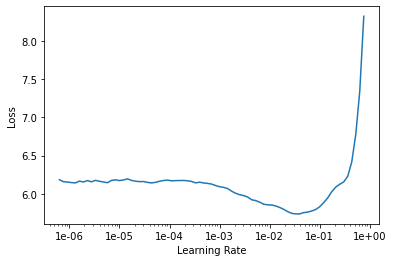

In [34]:
learn.recorder.plot()

In [20]:
# lr = 0.00003

In [35]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.344602,3.540942,0.796114,01:01
1,3.468170,2.987706,0.733931,01:01
2,3.018157,2.736940,0.682511,01:00
3,2.761754,2.653039,0.662182,01:01


In [38]:
# started training over again here
learn.fit_one_cycle(4, max_lr=6e-3)

epoch,train_loss,valid_loss,error_rate,time
0,3.924709,3.492231,0.790732,01:00
1,3.115181,2.712609,0.684604,01:00
2,2.597163,2.294519,0.587743,01:00
3,2.297015,2.165464,0.558744,01:00


In [41]:
# started training over again here
learn.fit_one_cycle(4, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,3.911370,3.353211,0.793722,01:00
1,3.071885,2.744899,0.706726,01:00
2,2.579811,2.272706,0.585650,01:00
3,2.247911,2.120821,0.553662,01:00


In [42]:
learn.save('56stage-1')

In [43]:
learn.fit_one_cycle(4, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,2.542546,3.010682,0.726457,01:00
1,2.593423,2.481284,0.652616,01:00
2,2.292967,2.088105,0.545590,01:00
3,2.019611,1.975514,0.521674,01:00


In [44]:
learn.save('56stage-2')

In [45]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fee428dac20>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/opt/conda/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/opt/conda/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


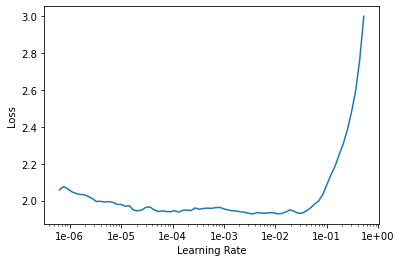

In [46]:
learn.recorder.plot()

In [47]:
learn.unfreeze()

In [48]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,2.173330,2.204531,0.583857,01:00
1,2.177702,2.097760,0.555755,01:00
2,1.869260,1.824218,0.485501,01:01
3,1.572816,1.766468,0.473543,01:01


In [49]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.762329,1.966650,0.518087,01:01
1,1.847298,1.963559,0.518984,01:01
2,1.571410,1.764946,0.471151,01:00
3,1.302250,1.701525,0.438864,01:01


In [50]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.505157,1.924679,0.493871,01:00
1,1.643386,1.898437,0.496562,01:01
2,1.385241,1.743072,0.461286,01:00
3,1.089500,1.696383,0.443348,01:00


In [ ]:
learn.save('56stage-f')

In [51]:
learn.load('56stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (13384 items)
x: ImageList
Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56)
y: CategoryList
Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus
Path: mushroom_classification_data_cleaned;

Valid: LabelList (3345 items)
x: ImageList
Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56)
y: CategoryList
Calocybe_gambosa,Kuehneromyces_mutabilis,Cortinarius_rubellus,Paxillus_atrotomentosus,Cantharellus_cibarius
Path: mushroom_classification_data_cleaned;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      

In [52]:
learn.fit_one_cycle(8, max_lr=slice(1e-5,5e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.991235,2.014499,0.531839,01:00
1,2.167279,2.156517,0.571001,01:01
2,2.139880,2.137360,0.572795,01:00
3,1.954690,1.974377,0.528550,01:00
4,1.762015,1.850836,0.489387,01:00
5,1.489762,1.763288,0.457997,01:00
6,1.302980,1.741146,0.448729,01:00
7,1.157189,1.712436,0.440658,01:00


In [54]:
learn.save('56stage-f')

OK! and error rate of 0.44 is less than the initial error rate than was yielded by resnet50 on the 224 size images, so this seems like a better starting point. Now lets try this model on size 112 images.

In [55]:
df = pd.read_csv(path/'cleaned.csv', header='infer')
tfms = get_transforms()
np.random.seed(33)
data = ImageDataBunch.from_df(path, df, valid_pct=0.2, ds_tfms=tfms, size=112).normalize(imagenet_stats)

In [56]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [57]:
learn.load('56stage-f')

Learner(data=ImageDataBunch;

Train: LabelList (13384 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus
Path: mushroom_classification_data_cleaned;

Valid: LabelList (3345 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
Calocybe_gambosa,Kuehneromyces_mutabilis,Cortinarius_rubellus,Paxillus_atrotomentosus,Cantharellus_cibarius
Path: mushroom_classification_data_cleaned;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4)

In [58]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.638575,1.558670,0.411958,01:10
1,1.457173,1.439404,0.390433,01:10
2,1.321637,1.400975,0.374589,01:10
3,1.248075,1.392153,0.373094,01:11


In [59]:
learn.save('112stage-1')

In [60]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


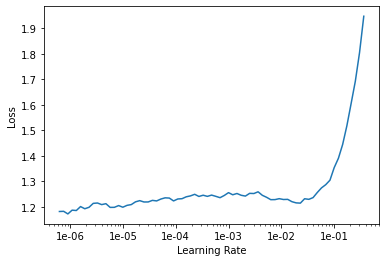

In [61]:
learn.recorder.plot()

In [62]:
learn.unfreeze()

In [63]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.260070,1.353586,0.367414,01:10
1,1.192783,1.295619,0.349477,01:10
2,1.039362,1.243765,0.334230,01:10
3,0.914160,1.228575,0.332436,01:09


In [64]:
learn.save('112stage-2')

In [65]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.950512,1.258226,0.334828,01:11
1,0.996381,1.229805,0.333632,01:11
2,0.845935,1.189068,0.315695,01:11
3,0.710514,1.177123,0.318087,01:10


In [66]:
learn.save('112stage-f')

Now try this one with the 224 size images

In [72]:
df = pd.read_csv(path/'cleaned.csv', header='infer')
tfms = get_transforms()
np.random.seed(33)
data = ImageDataBunch.from_df(path, df, valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

In [73]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [74]:
learn.load('112stage-f')

Learner(data=ImageDataBunch;

Train: LabelList (13384 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus
Path: mushroom_classification_data_cleaned;

Valid: LabelList (3345 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Calocybe_gambosa,Kuehneromyces_mutabilis,Cortinarius_rubellus,Paxillus_atrotomentosus,Cantharellus_cibarius
Path: mushroom_classification_data_cleaned;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4)

In [75]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.200578,1.242018,0.326158,01:45
1,1.043568,1.151967,0.297459,01:44
2,0.917459,1.118375,0.291480,01:45
3,0.840252,1.115097,0.292377,01:44


In [76]:
learn.save('224stage-1')

In [77]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


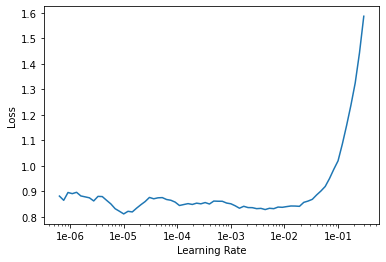

In [78]:
learn.recorder.plot()

In [79]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.855442,1.119147,0.291779,01:45
1,0.800579,1.113942,0.290583,01:45
2,0.786148,1.111228,0.286398,01:45
3,0.783328,1.111457,0.289387,01:44


In [80]:
learn.save('224stage-2')

In [81]:
learn.unfreeze()

In [82]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.894824,1.163043,0.293572,01:47
1,0.856062,1.081511,0.280419,01:47
2,0.706815,1.021885,0.264873,01:47
3,0.577373,0.993496,0.264873,01:47


In [83]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


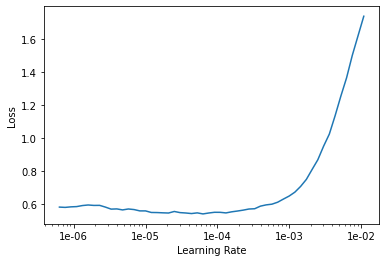

In [84]:
learn.recorder.plot()

In [85]:
learn.save('224stage-3')

In [86]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,5e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.575775,0.991374,0.259193,01:47
1,0.557621,0.988032,0.258894,01:47
2,0.568920,0.984913,0.258894,01:46
3,0.527491,0.982867,0.257698,01:47


In [87]:
learn.save('224stage-f')